In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import cross_validation, metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [2]:
X = pd.read_csv('X_train_sampled 0512.csv', usecols=[2,3,4,5,6,7,8,9,10,11])
y = pd.read_csv('y_train_sampled 0512.csv',index_col=0)

In [3]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.128865,67.0,0.0,0.352588,5833.0,8.0,0.0,1.0,0.0,0.0
1,0.179496,32.0,1.0,0.245922,5700.0,10.0,1.0,0.0,0.0,0.0
2,0.528844,53.0,0.0,0.491452,11990.0,15.0,0.0,3.0,0.0,3.0
3,0.018850,52.0,0.0,0.299567,5083.0,15.0,0.0,2.0,0.0,0.0
4,0.569364,32.0,2.0,0.649189,4500.0,10.0,0.0,1.0,2.0,2.0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

In [71]:
xt = pd.read_csv('X_test 0513 cleaned.csv', )
xt = xt.drop('Unnamed: 0', axis = 1)
xt.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.353590,66,0,0.580712,4800.0,9,0,2.0,0,0
1,0.024141,68,1,0.580712,4800.0,10,0,1.0,0,1
2,0.700250,27,0,0.242380,2066.0,4,0,0.0,0,2
3,0.023778,62,0,0.214561,9600.0,9,0,1.0,1,0
4,0.162417,65,0,0.491388,6908.0,10,0,2.0,0,1


In [74]:
xt.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000
mean,0.324012,51.392539,0.244068,0.306124,6302.366822,8.390824,0.091071,0.998697,0.068783,0.751269
std,0.349664,13.525367,0.693191,0.224608,3826.602105,4.627142,0.496408,0.958109,0.332293,1.081065
min,0.000000,21.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031043,41.000000,0.000000,0.132814,3467.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.163248,52.000000,0.000000,0.278950,5481.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.570958,62.000000,0.000000,0.442522,8378.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,80.000000,10.000000,1.000000,20000.000000,20.000000,13.000000,4.000000,6.000000,5.000000


In [80]:
yt = pd.read_csv('y_test 0513 cleaned.csv', header=None, usecols=[1])
#yt = yt.drop('0', axis = 1)
yt.columns = ['y']
yt.head()

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [81]:
yt.describe()

,y
count,14582.000000
mean,0.066452
std,0.249079
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
scaler = StandardScaler().fit(X_train)

In [6]:
#scaling features
X_train_scaled = scaler.transform(X_train) 
X_val_scaled = scaler.transform(X_val)

In [92]:
xt_scaled = scaler.transform(xt)

In [7]:
# LASSO
logit = LogisticRegression(solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=2500)

In [8]:
y_train = np.squeeze(y_train,axis=1)
print(y_train.shape)

(60409,)


In [9]:
print(X_train_scaled.shape)
print(y_train.shape)

(60409, 10)
(60409,)


In [10]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [11]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score 0.8798161469947148


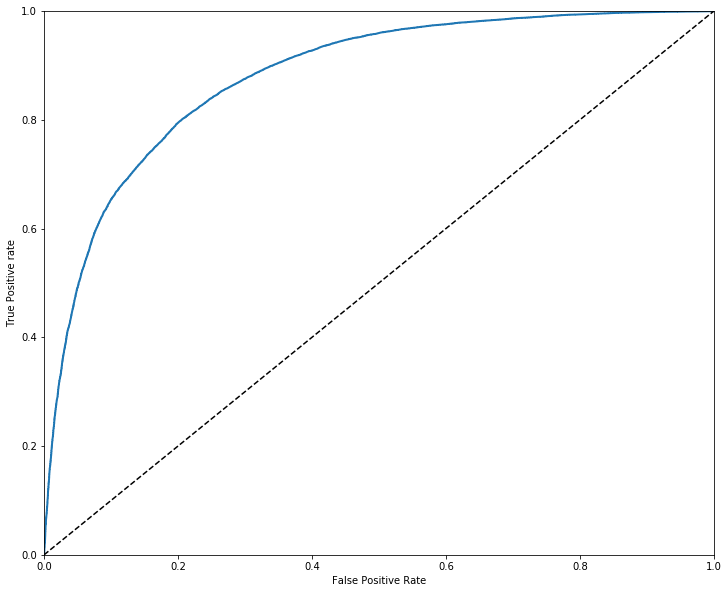

In [12]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.8798332411863865


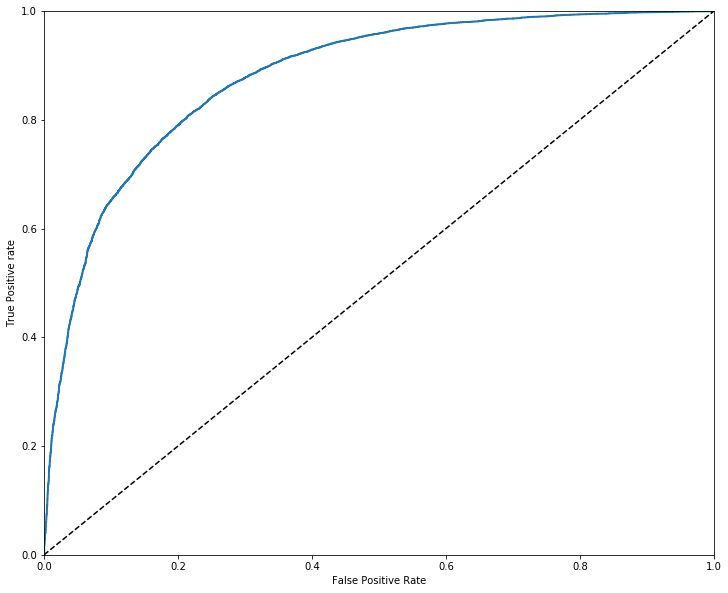

In [13]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("Val AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

Test AUC Score 0.5044760452905872


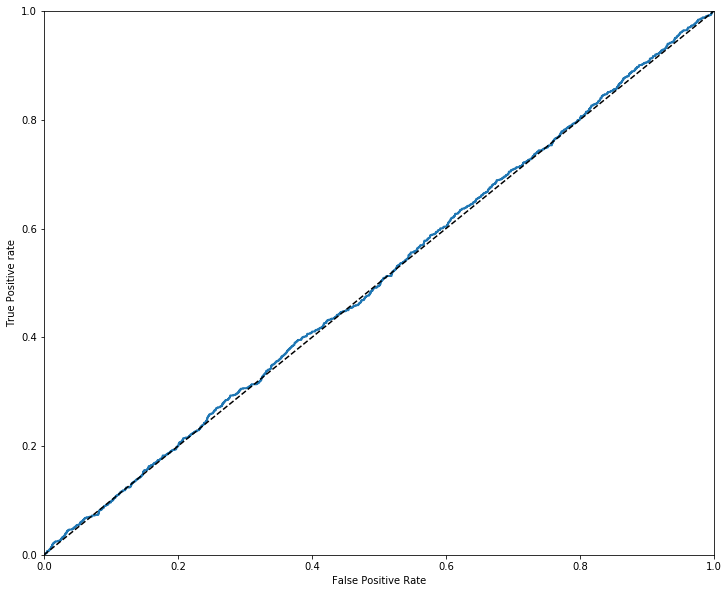

In [96]:
logit_scores_proba_t = logit.predict_proba(xt_scaled)
logit_scores_t = logit_scores_proba_t[:,1]
fpr_logit_t, tpr_logit_t, thresh_logit_t = roc_curve(yt, logit_scores_t)
plot_roc_curve(fpr_logit_t,tpr_logit_t)
print("Test AUC Score {}".format(roc_auc_score(yt,logit_scores_t)))

In [97]:
print("Train Accuracy : ", accuracy_score(y_train,logit.predict(X_train_scaled)))
print("Validation Accuracy : ", accuracy_score(y_val, logit.predict(X_val_scaled)))

Train Accuracy :  0.792961313711533
Validation Accuracy :  0.7923722500869047


In [98]:
print("Test Accuracy : ", accuracy_score(yt, logit.predict(xt_scaled)))

Test Accuracy :  0.7579893018790289


In [99]:
print('Train Confusion matrix : ', confusion_matrix(y_train,logit.predict(X_train_scaled)))
print('Val Confusion matrix : ', confusion_matrix(y_val,logit.predict(X_val_scaled)))
print('Test Confusion matrix : ', confusion_matrix(yt,logit.predict(xt_scaled)))

Train Confusion matrix :  [[24920  5265]
 [ 7242 22982]]
Val Confusion matrix :  [[8382 1706]
 [2475 7574]]
Test Confusion matrix :  [[10853  2760]
 [  769   200]]


In [104]:
# RIDGE
l2 = LogisticRegression(solver="saga", penalty="l2", class_weight="balanced", C=1.0, max_iter=2500)
l2.fit(X_train_scaled, y_train)
l2_scores_proba = l2.predict_proba(X_train_scaled)
l2_scores = l2_scores_proba[:,1]

AUC Score 0.8798145422795531


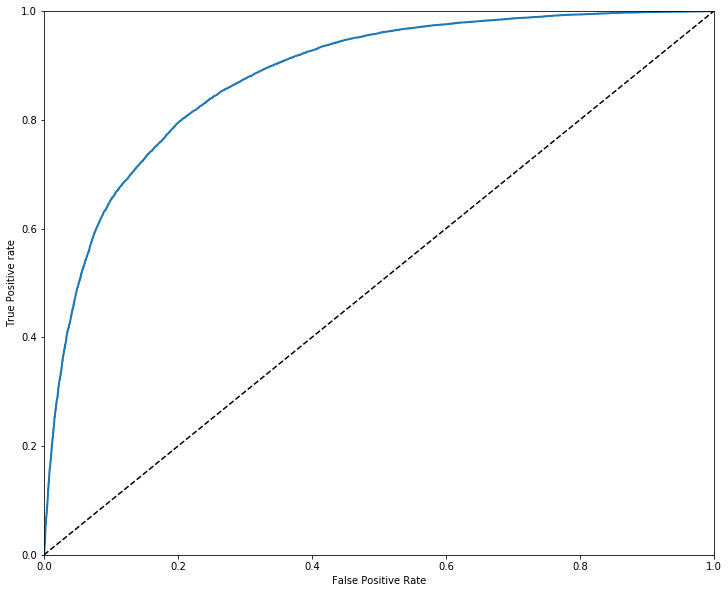

In [105]:
fpr_l2, tpr_l2, thresh_l2 = roc_curve(y_train, l2_scores)
plot_roc_curve(fpr_l2,tpr_l2)
print("AUC Score {}".format(roc_auc_score(y_train,l2_scores)))

AUC Score 0.8798300648393056


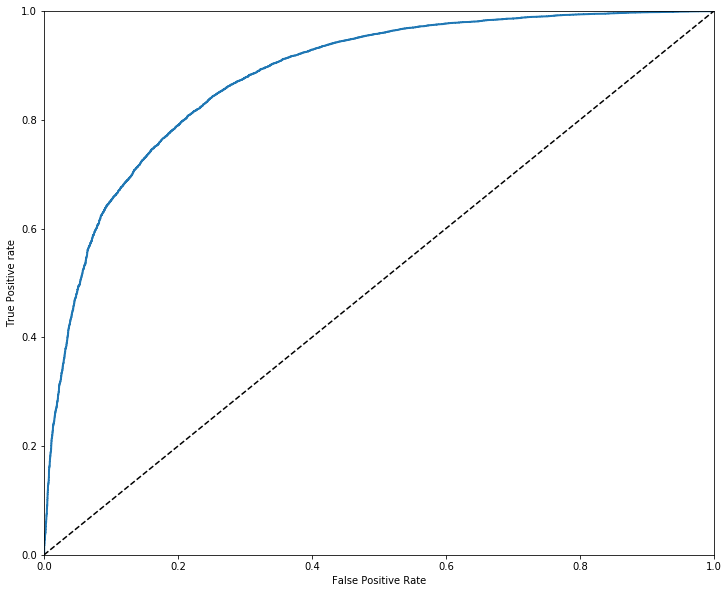

In [106]:
l2_scores_proba_val = l2.predict_proba(X_val_scaled)
l2_scores_val = l2_scores_proba_val[:,1]
fpr_l2_val, tpr_l2_val, thresh_l2_val = roc_curve(y_val, l2_scores_val)
plot_roc_curve(fpr_l2_val,tpr_l2_val)
print("AUC Score {}".format(roc_auc_score(y_val,l2_scores_val)))

AUC Score 0.5044741500585589


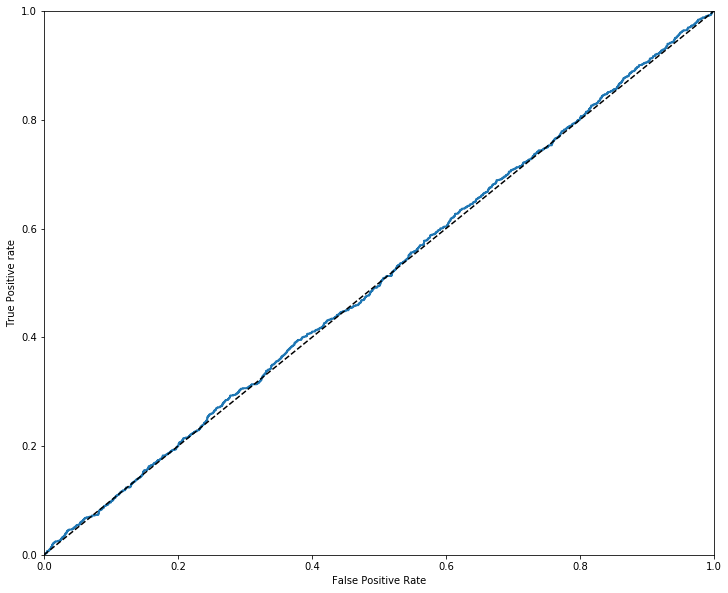

In [112]:
l2_scores_proba_t = l2.predict_proba(xt_scaled)
l2_scores_t = l2_scores_proba_t[:,1]
fpr_l2_t, tpr_l2_t, thresh_l2_t = roc_curve(yt, l2_scores_t)
plot_roc_curve(fpr_l2_t,tpr_l2_t)
print("AUC Score {}".format(roc_auc_score(yt,l2_scores_t)))

In [113]:
print("Train Accuracy : ", accuracy_score(y_train,l2.predict(X_train_scaled)))
print("Validation Accuracy : ", accuracy_score(y_val, l2.predict(X_val_scaled)))
print("Test Accuracy : ", accuracy_score(yt, l2.predict(xt_scaled)))
print('Train Confusion matrix : ', confusion_matrix(y_train,l2.predict(X_train_scaled)))
print('Val Confusion matrix : ', confusion_matrix(y_val,l2.predict(X_val_scaled)))
print('Test Confusion matrix : ', confusion_matrix(yt,l2.predict(xt_scaled)))

Train Accuracy :  0.7929944213610555
Validation Accuracy :  0.7924219099170681
Test Accuracy :  0.7580578795775613
Train Confusion matrix :  [[24922  5263]
 [ 7242 22982]]
Val Confusion matrix :  [[8383 1705]
 [2475 7574]]
Test Confusion matrix :  [[10854  2759]
 [  769   200]]


AUC Score 0.9429660725289162


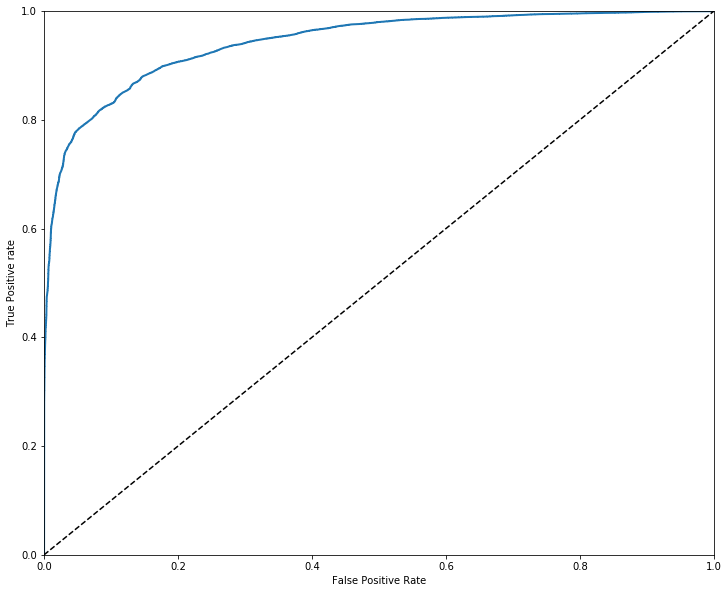

In [114]:
# Random Forest
forest = RandomForestClassifier(n_estimators=300, max_depth=5, class_weight="balanced")
trained = forest.fit(X_train,y_train)
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores))) 

AUC Score 0.9430535025480618


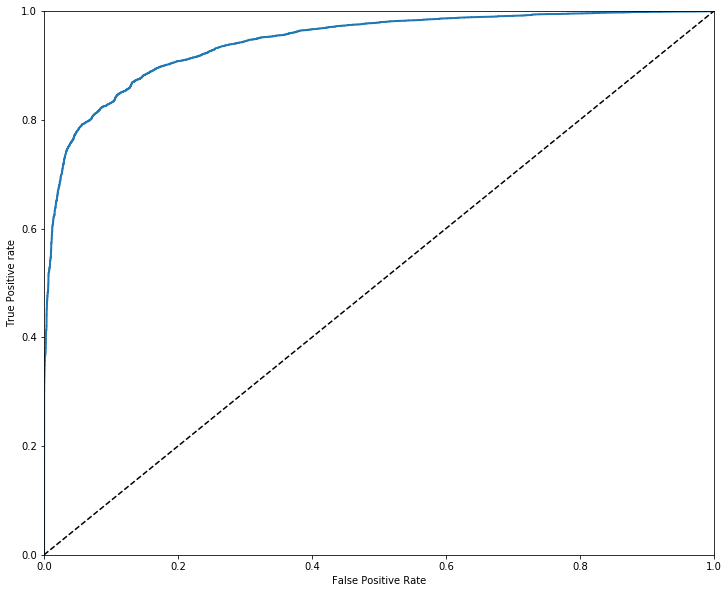

In [115]:
y_val_proba = forest.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

AUC Score 0.5027215531926814


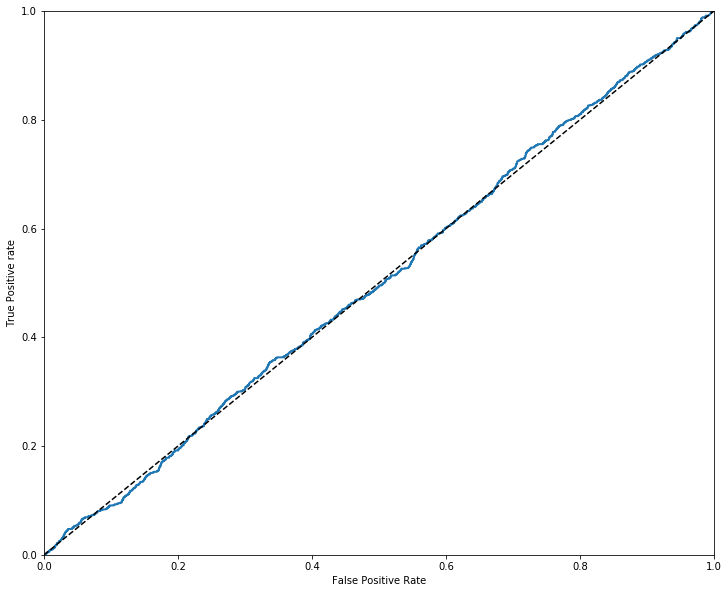

In [124]:
forest_scores_proba_t = forest.predict_proba(xt)
forest_scores_t = forest_scores_proba_t[:,1]
fpr_forest_t, tpr_forest_t, thresh_forest_t = roc_curve(yt, forest_scores_t)
plot_roc_curve(fpr_forest_t,tpr_forest_t)
print("AUC Score {}".format(roc_auc_score(yt,forest_scores_t)))

In [117]:
print("Train Accuracy :: ", accuracy_score(y_train,forest.predict(X_train)))
print("Validation Accuracy  :: ", accuracy_score(y_val, forest.predict(X_val)))
print("Test Accuracy : ", accuracy_score(yt, forest.predict(xt)))

Train Accuracy ::  0.8663444188779817
Validation Accuracy  ::  0.8682524705765506
Test Accuracy :  0.8137429707859004


In [126]:
print('Train Confusion matrix : ', confusion_matrix(y_train,forest.predict(X_train)))
print('Val Confusion matrix : ', confusion_matrix(y_val,forest.predict(X_val)))
print('Test Confusion matrix : ', confusion_matrix(yt,forest.predict(xt)))

Train Confusion matrix :  [[26828  3357]
 [ 4717 25507]]
Val Confusion matrix :  [[8982 1106]
 [1547 8502]]
Test Confusion matrix :  [[11744  1869]
 [  847   122]]


In [119]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


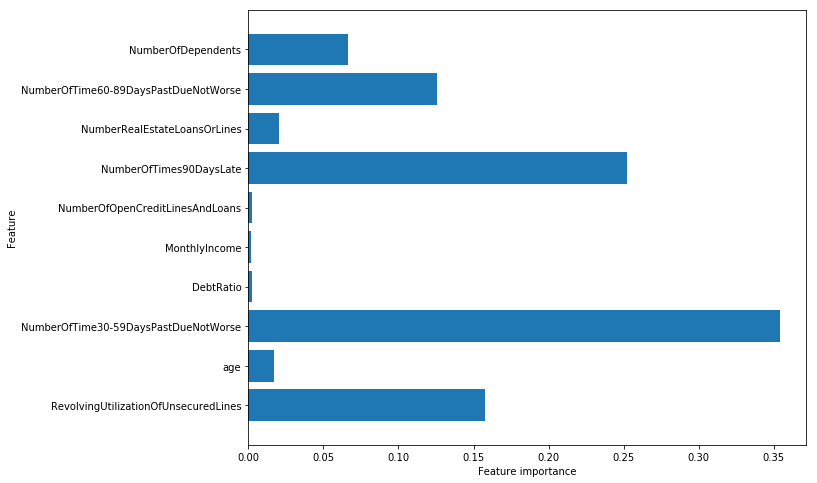

In [120]:
plot_feature_importances(forest)

In [51]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1500, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 3, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [52]:
rf = RandomForestClassifier()
gsearch = GridSearchCV(estimator = rf, param_grid = random_grid, scoring='accuracy', cv = 10, verbose=2, n_jobs = -1)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 53.1min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 91.5min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 138.6min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 194.8min
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed: 257.6min
[Parallel(n_jobs=-1)]: Done 3233 tasks      | elapsed: 341.2min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed: 461.6min
[Parallel(n_jobs=-1)]: Done 4853 tasks      | elapsed: 595.4min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 681.1min finished


best score is: 0.9167673691006307
best params are: {'bootstrap': False, 'max_depth': 110, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 900}


In [54]:
best_rf = gsearch.best_estimator_

Validation Accuracy  ::  0.9136415553458808


AUC Score 0.9999999682126094


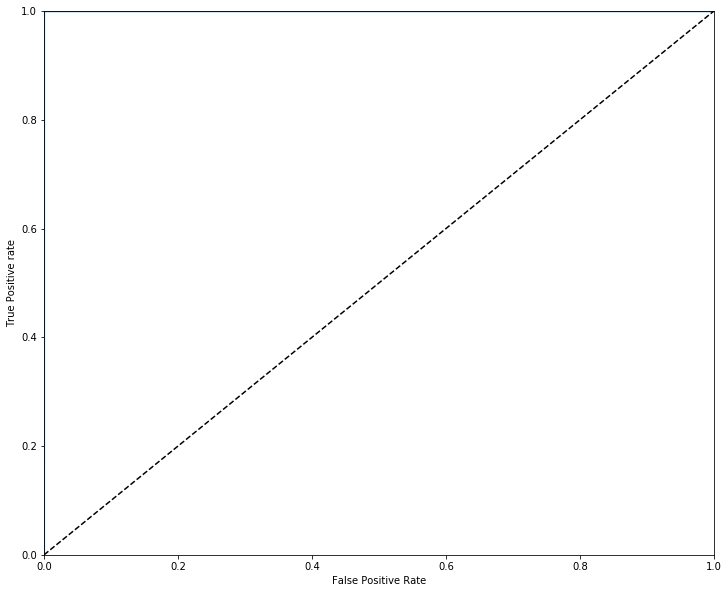

In [121]:
be_rf = RandomForestClassifier(n_estimators=900, max_depth=110, max_features='auto', 
                               min_samples_leaf=1, min_samples_split=5, bootstrap=False)
be_rf.fit(X_train,y_train)
y_scores_proba = be_rf.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores))) 

AUC Score 0.969067577987607


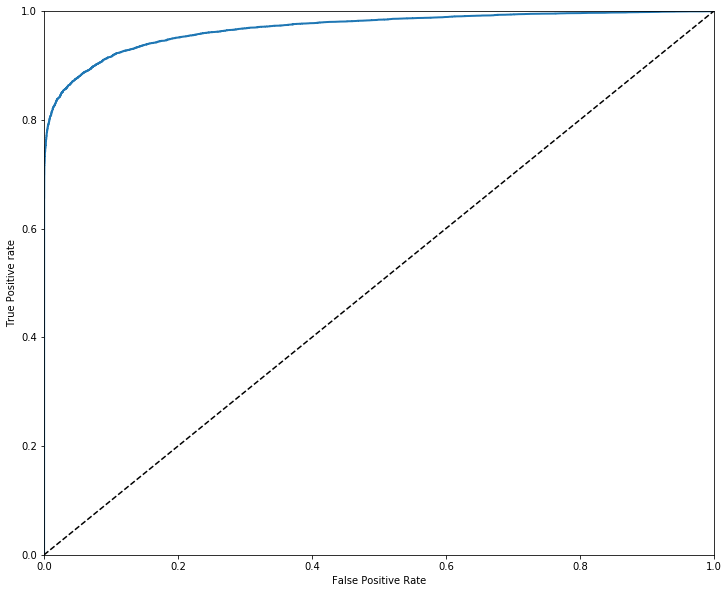

In [122]:
y_val_proba = be_rf.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

AUC Score 0.5007557048189761


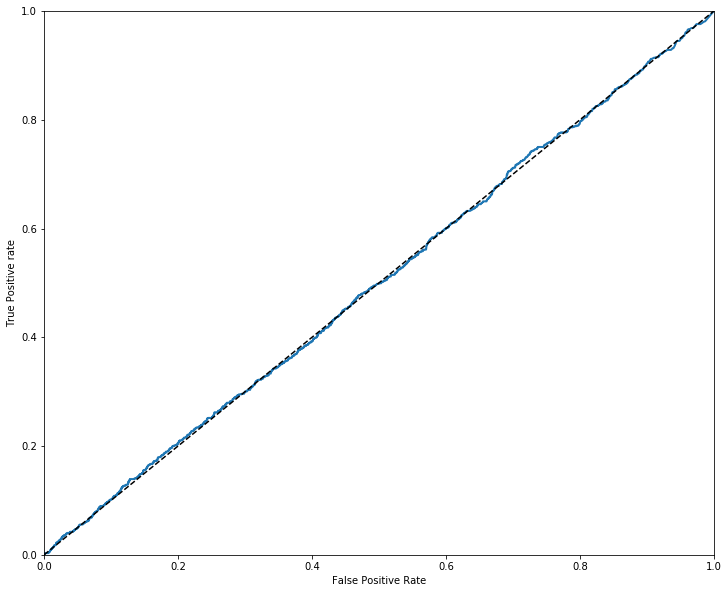

In [125]:
be_rf_scores_proba_t = be_rf.predict_proba(xt)
be_rf_scores_t = be_rf_scores_proba_t[:,1]
fpr_be_rf_t, tpr_be_rf_t, thresh_be_rf_t = roc_curve(yt, be_rf_scores_t)
plot_roc_curve(fpr_be_rf_t,tpr_be_rf_t)
print("AUC Score {}".format(roc_auc_score(yt,be_rf_scores_t)))

In [123]:
print("Train Accuracy: ", accuracy_score(y_train,be_rf.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, be_rf.predict(X_val)))
print("Test Accuracy: ", accuracy_score(yt, be_rf.predict(xt)))

Train Accuracy:  0.9999337847009552
Validation Accuracy:  0.9137408750062075
Test Accuracy:  0.8706624605678234


In [127]:
print('Train Confusion matrix : ', confusion_matrix(y_train,be_rf.predict(X_train)))
print('Val Confusion matrix : ', confusion_matrix(y_val,be_rf.predict(X_val)))
print('Test Confusion matrix : ', confusion_matrix(yt,be_rf.predict(xt)))

Train Confusion matrix :  [[30184     1]
 [    3 30221]]
Val Confusion matrix :  [[9528  560]
 [1177 8872]]
Test Confusion matrix :  [[12626   987]
 [  899    70]]


AUC Score 0.9886621809762683


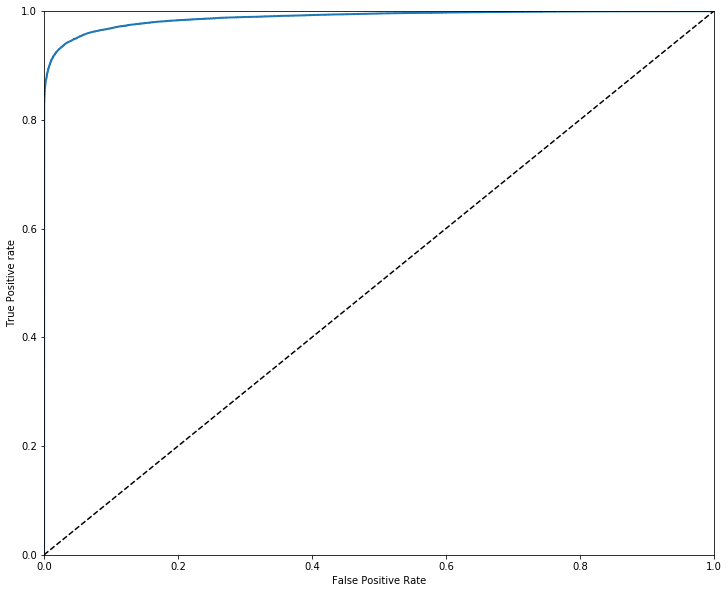

In [128]:
# Gradient Boosting Classifier
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8)
gbc_clf.fit(X_train,y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

In [129]:
gbc_val_proba = gbc_clf.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.9711122577088364


AUC Score 0.5007750361856651


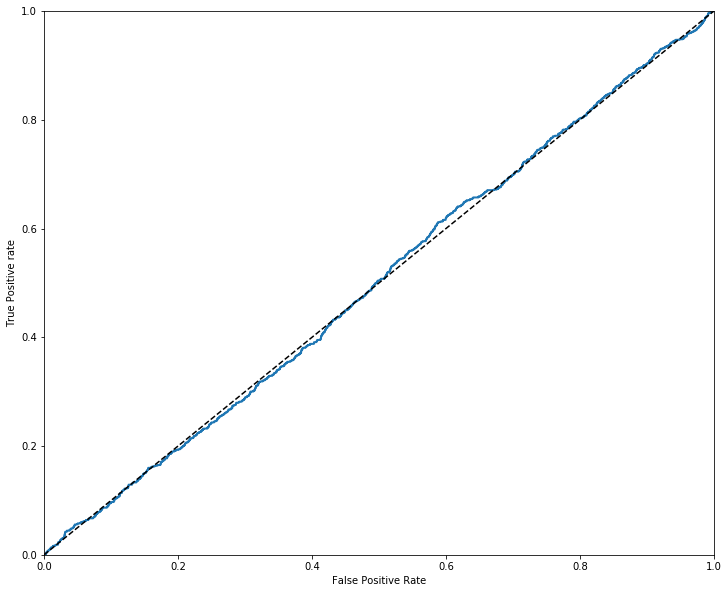

In [131]:
gbc_scores_proba_t = gbc_clf.predict_proba(xt)
gbc_scores_t = gbc_scores_proba_t[:,1]
fpr_gbc_t, tpr_gbc_t, thresh_gbc_t = roc_curve(yt, gbc_scores_t)
plot_roc_curve(fpr_gbc_t,tpr_gbc_t)
print("AUC Score {}".format(roc_auc_score(yt,gbc_scores_t)))

In [132]:
print("Train Accuracy: ", accuracy_score(y_train,gbc_clf.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, gbc_clf.predict(X_val)))
print("Test Accuracy: ", accuracy_score(yt, gbc_clf.predict(xt)))
print('Train Confusion matrix : ', confusion_matrix(y_train,gbc_clf.predict(X_train)))
print('Val Confusion matrix : ', confusion_matrix(y_val,gbc_clf.predict(X_val)))
print('Test Confusion matrix : ', confusion_matrix(yt,gbc_clf.predict(xt)))

Train Accuracy:  0.9523249846877121
Validation Accuracy:  0.9224313452847991
Test Accuracy:  0.8785488958990536
Train Confusion matrix :  [[29700   485]
 [ 2395 27829]]
Val Confusion matrix :  [[9654  434]
 [1128 8921]]
Test Confusion matrix :  [[12749   864]
 [  907    62]]


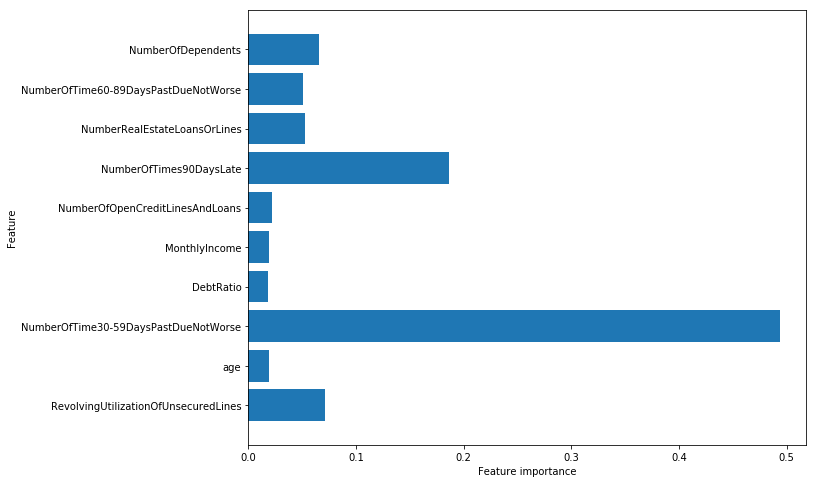

In [133]:
plot_feature_importances(gbc_clf)

AUC Score 0.9627716490105616


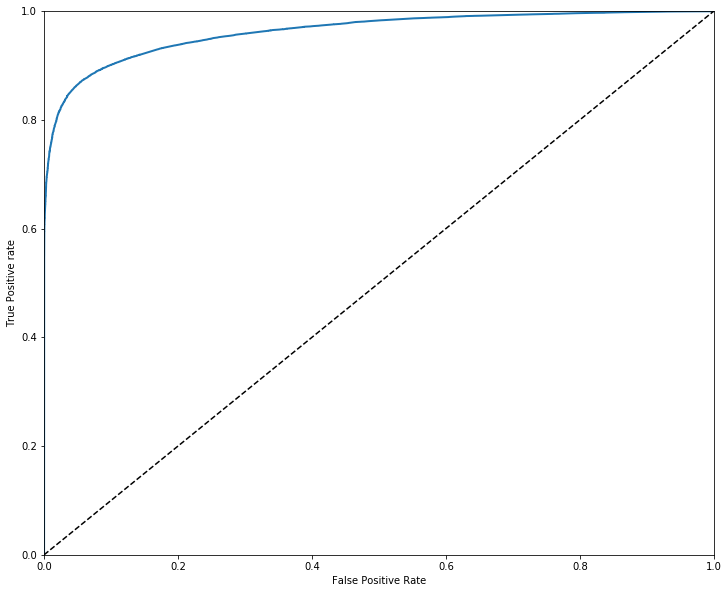

In [134]:
# ADABOOSTING CLASSIFIER
ada = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=0.5)
ada.fit(X_train,y_train)
ada_proba = ada.predict_proba(X_train)
ada_scores = ada_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, ada_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, ada_scores)))

In [135]:
ada_val_proba = ada.predict_proba(X_val)
ada_val_scores = ada_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y_val, ada_val_scores)))

AUC Score 0.963707763560457


AUC Score 0.5017540751468597


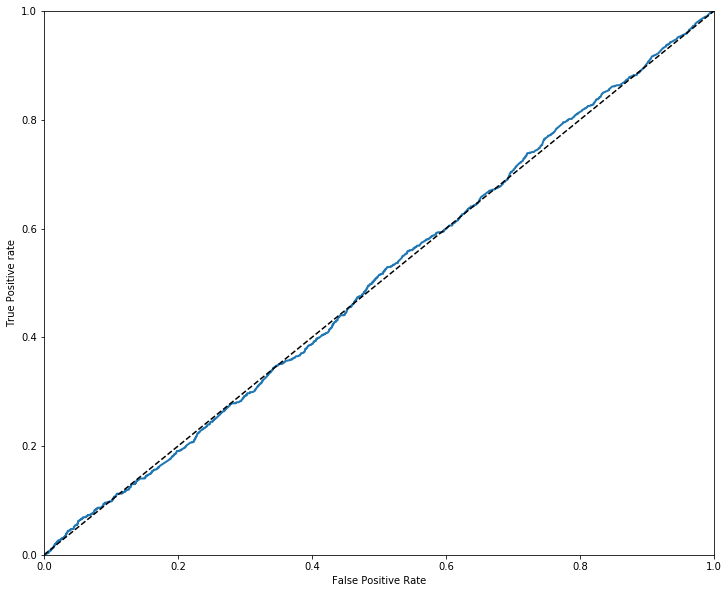

In [136]:
ada_scores_proba_t = ada.predict_proba(xt)
ada_scores_t = ada_scores_proba_t[:,1]
fpr_ada_t, tpr_ada_t, thresh_ada_t = roc_curve(yt, ada_scores_t)
plot_roc_curve(fpr_ada_t,tpr_ada_t)
print("AUC Score {}".format(roc_auc_score(yt,ada_scores_t)))

In [137]:
print("Train Accuracy: ", accuracy_score(y_train,ada.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, ada.predict(X_val)))
print("Test Accuracy: ", accuracy_score(yt, ada.predict(xt)))
print('Train Confusion matrix : ', confusion_matrix(y_train,ada.predict(X_train)))
print('Val Confusion matrix : ', confusion_matrix(y_val,ada.predict(X_val)))
print('Test Confusion matrix : ', confusion_matrix(yt,ada.predict(xt)))

Train Accuracy:  0.9075634425333974
Validation Accuracy:  0.9090231911406863
Test Accuracy:  0.8677136195309285
Train Confusion matrix :  [[28590  1595]
 [ 3989 26235]]
Val Confusion matrix :  [[9554  534]
 [1298 8751]]
Test Confusion matrix :  [[12574  1039]
 [  890    79]]


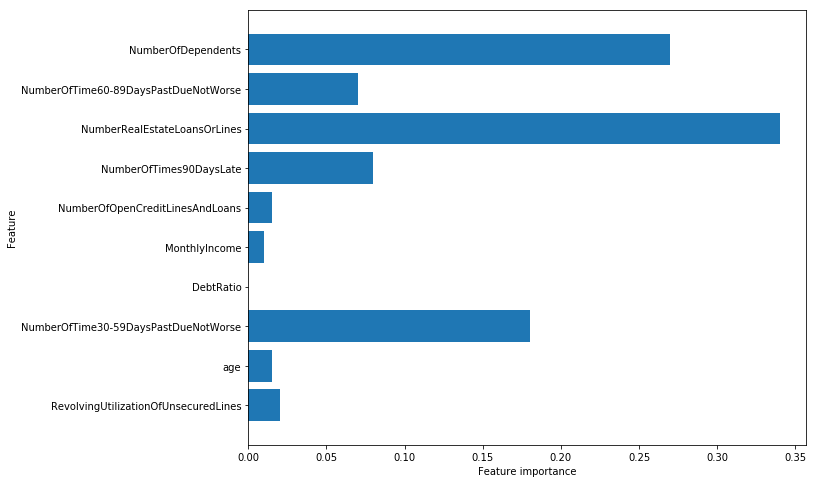

In [138]:
plot_feature_importances(ada)

In [67]:
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]

# Create the random grid
ada_grid = {'n_estimators': n_estimators,
            'learning_rate' : [0.01,0.05,0.1,0.3,0.7,1,1.3]}

In [68]:
ada = AdaBoostClassifier()
gsearch = GridSearchCV(estimator = ada, param_grid = ada_grid, scoring='accuracy', cv = 10, verbose=2, n_jobs = -1)
gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed: 50.3min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 59.9min finished


best score is: 0.9217004088794716
best params are: {'learning_rate': 1.3, 'n_estimators': 2000}


In [82]:
best_ada = gsearch.best_estimator_
print("Validation Accuracy  :: ", accuracy_score(y_val, best_ada.predict(X_val)))
print("Test Accuracy  :: ", accuracy_score(yt, best_ada.predict(xt)))

Validation Accuracy  ::  0.9236728410388837
Test Accuracy  ::  0.8877383075024002


AUC Score 0.9733682841903198


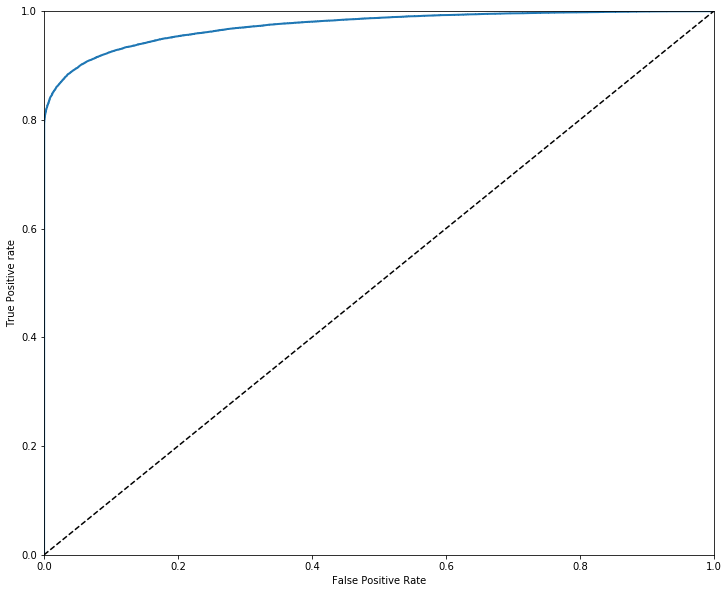

In [143]:
best_ada_proba = best_ada.predict_proba(X_train)
best_ada_scores = best_ada_proba[:,1]
fpr_best_ada, tpr_best_ada, thresh_best_ada = roc_curve(y_train, best_ada_scores)
plot_roc_curve(fpr_best_ada, tpr_best_ada)
print("AUC Score {}".format(roc_auc_score(y_train, best_ada_scores)))

In [141]:
best_ada_val_proba = best_ada.predict_proba(X_val)
best_ada_val_scores = best_ada_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y_val, best_ada_val_scores)))

AUC Score 0.9713520423201492


AUC Score 0.5035710719970599


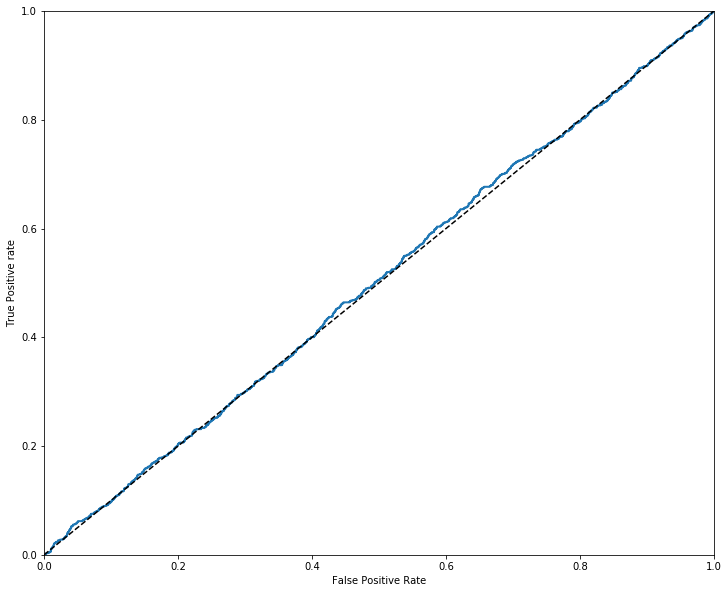

In [140]:
best_ada_scores_proba_t = best_ada.predict_proba(xt)
best_ada_scores_t = best_ada_scores_proba_t[:,1]
fpr_best_ada_t, tpr_best_ada_t, thresh_best_ada_t = roc_curve(yt, best_ada_scores_t)
plot_roc_curve(fpr_best_ada_t,tpr_best_ada_t)
print("AUC Score {}".format(roc_auc_score(yt,best_ada_scores_t)))

In [139]:
print("Train Accuracy: ", accuracy_score(y_train,best_ada.predict(X_train)))
print("Validation Accuracy: ", accuracy_score(y_val, best_ada.predict(X_val)))
print("Test Accuracy: ", accuracy_score(yt, best_ada.predict(xt)))
print('Train Confusion matrix : ', confusion_matrix(y_train,best_ada.predict(X_train)))
print('Val Confusion matrix : ', confusion_matrix(y_val,best_ada.predict(X_val)))
print('Test Confusion matrix : ', confusion_matrix(yt,best_ada.predict(xt)))

Train Accuracy:  0.9236868678508169
Validation Accuracy:  0.9236728410388837
Test Accuracy:  0.8877383075024002
Train Confusion matrix :  [[29229   956]
 [ 3654 26570]]
Val Confusion matrix :  [[9757  331]
 [1206 8843]]
Test Confusion matrix :  [[12885   728]
 [  909    60]]
